In [ ]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
game = pd.read_csv('/content/vgames2.csv')
game

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1. 데이터 결측치, 중복값 처리

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 의미없는 열 삭제
game = game.drop(columns='Unnamed: 0')

In [ ]:
# 중복값 확인
game[game.duplicated()]

# 데이터 같은 행 확인
game[game.Name == 'Wii de Asobu: Metroid Prime']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
# 중복 행 삭제
game = game.drop(index = 8055).reset_index(drop=True)

In [ ]:
# 중복치 확인
game.duplicated().sum()

0

In [ ]:
# 결측치 확인
game.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 16597개중에 270개면 2%도 안되므로 Year 결측치행 삭제
game_year_drop = game.dropna(subset=['Year'])
game = game_year_drop.reset_index(drop=True)

In [ ]:
game.isnull().sum() #56개도 전부 제거. 총 3%도 안되는 값 제거

Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
# Publisher 필요한 경우, 확인용
game_publisher = game[['Name','Publisher']]
game_publisher

,Name,Publisher
0,Candace Kane's Candy Factory,Destineer
1,The Munchables,Namco Bandai Games
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Alchemist
3,Deal or No Deal: Special Edition,Zoo Games
4,Ben 10 Ultimate Alien: Cosmic Destruction,D3Publisher
...,...,...
16322,Ice Age 2: The Meltdown,Vivendi Games
16323,Rainbow Islands: Revolution,Rising Star Games
16324,NBA 2K16,Take-Two Interactive
16325,Toukiden: The Age of Demons,Tecmo Koei


In [ ]:
# 배급회사 제거
#game.drop(['Publisher'], axis=1, inplace=True)

# 장르 결측치 제거
game_genre_drop= game.dropna(subset=['Genre'])
game_clear = game_genre_drop.reset_index(drop=True)

In [ ]:
game_clear.duplicated().sum()

0

### 2. 데이터 가공하기 쉽도록 수정 (데이터 타입, 출고량등)

In [ ]:
# 타입 확인
game_clear.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

#### 2-1. 날짜 데이터 수정

In [ ]:
# 날짜 타입 변경
game_clear = game_clear.astype({'Year':'int'})

In [ ]:
# 날짜 데이터 확인
game_clear.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [ ]:
# 날짜열 결측치 확인
game_clear[(game_clear.Year == 0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9112,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0,0,0.2,0
14384,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0,0.01
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [ ]:
# 날짜열 결측치 검색해서 수정
game_clear.loc[9112, 'Year'] = 2000
game_clear.loc[14384, 'Year'] = 1999
game_clear.loc[16078, 'Year'] = 2000

In [ ]:
# 날짜열 결측치 확인
game_clear[(game_clear.Year == 0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
# 2000년대 이상치 확인
game_clear[(game_clear.Year > 9) & (game_clear.Year < 85)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
2970,Toaru Kagaku no Chou Denjihou,PSP,11,Adventure,Kadokawa Shoten,0,0,0.06,0
2993,Kamen Rider Battle: Ganbaride,DS,10,Strategy,Namco Bandai Games,0,0,0.14,0
3936,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
4236,Gunblade NY & L.A. Machineguns Arcade Hits Pack,Wii,10,Shooter,Sega,0.06,0.01,0,0.01
4633,NBA 2K15,PS4,14,Sports,Take-Two Interactive,1.46,0.54,0.01,0.37
5091,Omega Labyrinth,PSV,15,Role-Playing,D3Publisher,0,0,0.05,0
5835,F.E.A.R. 3,X360,11,Shooter,Warner Bros. Interactive Entertainment,0.3,0.11,0.01,0.04
6000,Kingdom Hearts: Birth by Sleep,PSP,10,Role-Playing,Square Enix,0.63,0.42,0.75,0.26


In [ ]:
# 날짜 이상치 수정
for i in range(len(game_clear.Name)):
  if (game_clear.Year[i] > 9) & (game_clear.Year[i] < 85):
    game_clear.Year[i] = int('20' + str(game_clear.Year[i]))

<ipython-input-22-94ff84b4ee4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear.Year[i] = int('20' + str(game_clear.Year[i]))


In [ ]:
# 이상치 수정값 확인
game_clear[(game_clear.Year > 9) & (game_clear.Year < 85)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
# 날짜 이상치 확인 (한자리수)
game_clear[(game_clear.Year < 11)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1002,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1205,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1345,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19
1390,Rogue Warrior,PS3,9,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1659,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8,Action,THQ,0.29,0.22,0,0.07
2211,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
2413,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2426,Splat Renegade Paintball,XB,5,Sports,Take-Two Interactive,0.04,0.01,0,0


In [ ]:
# 날짜 이상치 수정 (한자리수)
for i in range(len(game_clear.Name)):
  if (game_clear.Year[i] < 11):
    game_clear.Year[i] = int('200' + str(game_clear.Year[i]))

<ipython-input-25-7dd3b5b2d5a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear.Year[i] = int('200' + str(game_clear.Year[i]))


In [ ]:
# 날짜 이상치 수정값 확인 (한자리수)
game_clear[(game_clear.Year < 11)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
# 90년대 이상치 확인
game_clear[(game_clear.Year >= 85) & (game_clear.Year < 100)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
895,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0,0,0.9,0
2388,Casper,PS,96,Adventure,Interplay,0.46,0.31,0,0.05
3429,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4281,Adventure Island,NES,86,Platform,Hudson Soft,0,0,1.05,0
4713,Virtua Cop,SAT,95,Shooter,Sega,0,0,0.62,0
4745,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0,0,0.42,0.03
10132,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0,0
10512,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11123,Super Fire ProWrestling X,SNES,95,Fighting,Human Entertainment,0,0,0.28,0


In [ ]:
# 날짜 이상치 수정 (90년대)
for i in range(len(game_clear.Name)):
  if (game_clear.Year[i] >= 85) & (game_clear.Year[i] < 100):
    game_clear.Year[i] = int('19' + str(game_clear.Year[i]))

<ipython-input-28-3ec29dadecc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear.Year[i] = int('19' + str(game_clear.Year[i]))


In [ ]:
# 90년대 이상치 수정값 확인
game_clear[(game_clear.Year >= 85) & (game_clear.Year < 100)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
# 날짜 데이터 최종 확인
game_clear.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

#### 2-2. 출고량 데이터 수정

In [ ]:
# 출고량 유니크값 확인
game_clear.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [ ]:
# 출고량 데이터 K,M, 소수점 확인
game_clear[game_clear['NA_Sales'].str.contains('M') | game_clear['EU_Sales'].str.contains('K') |game_clear['JP_Sales'].str.contains('K')] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
87,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,0.15,0K,0.03
88,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0K,0.02
125,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0K,0.01,0
135,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,50K,0.04,0.02
...,...,...,...,...,...,...,...,...,...
16058,Kill.Switch,XB,2003,Shooter,Namco Bandai Games,0.18,50K,0,0.01
16092,NASCAR 06: Total Team Control,PS2,2005,Racing,Electronic Arts,0.53M,0.02,0,0.09
16157,NBA Ballers: Chosen One,PS3,2008,Sports,Midway Games,0.12,0,0K,0.01
16163,Super Robot Taisen F Kanketsuhen,SAT,1998,Strategy,Banpresto,0M,0,0.55,0


In [ ]:
# 출고량 개수 차이를 고려하여 기본단위 M으로 생각
# 북미지역 출고량 데이터 맞춰줌

def sales(x):
  for i in range(len(game_clear.Name)):
    if 'K' in game_clear.NA_Sales[i]:
      #print(game_clear.NA_Sales[i])
      result = game_clear['NA_Sales'][i].replace('K', '')
      result = (float(result)) * 1000
      game_clear['NA_Sales'][i] = result

    elif 'M' in game_clear.NA_Sales[i]:
      result2 = game_clear['NA_Sales'][i].replace('M', '')
      result2 = (float(result2)) * 1000000
      game_clear['NA_Sales'][i] = result2

    else:
      game_clear['NA_Sales'][i] = float(game_clear['NA_Sales'][i]) * 1000000

      #mod= [re.sub('[^A-Za-z0-9]','',s) for s in game_clear['NA_Sales'][i]]
      #num = game_clear['NA_Sales'][i].extract
      #print(mod)
      #error_names.이름 = error_names.이름.str.replace('[_!.\d+]', '')

sales(game_clear['NA_Sales'])
    # .NA_Sales[i].contains('K'):
    #  num = game_clear['NA_Sales'][i].extract(r'(\d+.\d+| \d+)')

<ipython-input-33-931d3f0e9f0a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['NA_Sales'][i] = float(game_clear['NA_Sales'][i]) * 1000000
<ipython-input-33-931d3f0e9f0a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['NA_Sales'][i] = result
<ipython-input-33-931d3f0e9f0a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['NA_Sales'][i] = result2


In [ ]:
# 유럽지역 출고량 데이터 맞춰줌

def sales(x):
  for i in range(len(game_clear.Name)):
    if 'K' in game_clear.EU_Sales[i]:
      #print(game_clear.EU_Sales[i])
      result = game_clear['EU_Sales'][i].replace('K', '')
      result = (float(result)) * 1000
      game_clear['EU_Sales'][i] = result

    elif 'M' in game_clear.EU_Sales[i]:
      result2 = game_clear['EU_Sales'][i].replace('M', '')
      result2 = (float(result2)) * 1000000
      game_clear['EU_Sales'][i] = result2

    else:
      game_clear['EU_Sales'][i] = float(game_clear['EU_Sales'][i]) * 1000000

sales(game_clear['EU_Sales'])

<ipython-input-34-0ffbaf2c5b8a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['EU_Sales'][i] = float(game_clear['EU_Sales'][i]) * 1000000
<ipython-input-34-0ffbaf2c5b8a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['EU_Sales'][i] = result2
<ipython-input-34-0ffbaf2c5b8a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['EU_Sales'][i] = result


In [ ]:
# 일본지역 출고량 데이터 맞춰줌

def sales(x):
  for i in range(len(game_clear.Name)):
    if 'K' in game_clear.JP_Sales[i]:
      #print(game_clear.JP_Sales[i])
      result = game_clear['JP_Sales'][i].replace('K', '')
      result = (float(result)) * 1000
      game_clear['JP_Sales'][i] = result

    elif 'M' in game_clear.JP_Sales[i]:
      result2 = game_clear['JP_Sales'][i].replace('M', '')
      result2 = (float(result2)) * 1000000
      game_clear['JP_Sales'][i] = result2

    else:
      game_clear['JP_Sales'][i] = float(game_clear['JP_Sales'][i]) * 1000000
      
sales(game_clear['JP_Sales'])

<ipython-input-35-793e14ea1ed1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['JP_Sales'][i] = float(game_clear['JP_Sales'][i]) * 1000000
<ipython-input-35-793e14ea1ed1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['JP_Sales'][i] = result
<ipython-input-35-793e14ea1ed1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['JP_Sales'][i] = result2


In [ ]:
# 기타지역 출고량 데이터 맞춰줌

def sales(x):
  for i in range(len(game_clear.Name)):
    if 'K' in game_clear.Other_Sales[i]:
      #print(game_clear.Other_Sales[i])
      result = game_clear['Other_Sales'][i].replace('K', '')
      result = (float(result)) * 1000
      game_clear['Other_Sales'][i] = result

    elif 'M' in game_clear.Other_Sales[i]:
      result2 = game_clear['Other_Sales'][i].replace('M', '')
      result2 = (float(result2)) * 1000000
      game_clear['Other_Sales'][i] = result2

    else:
      game_clear['Other_Sales'][i] = float(game_clear['Other_Sales'][i]) * 1000000
      
sales(game_clear['Other_Sales'])

<ipython-input-36-f8d35c9de3fe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['Other_Sales'][i] = float(game_clear['Other_Sales'][i]) * 1000000
<ipython-input-36-f8d35c9de3fe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['Other_Sales'][i] = result2
<ipython-input-36-f8d35c9de3fe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clear['Other_Sales'][i] = result


In [ ]:
# 각각 맞춰준 데이터셋 타입 변경 int
game_clear = game_clear.astype({'NA_Sales':'int'})
game_clear = game_clear.astype({'EU_Sales':'int'})
game_clear = game_clear.astype({'JP_Sales':'int'})
game_clear = game_clear.astype({'Other_Sales':'int'})

In [ ]:
# 완성 데이터 확인
game_clear.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000


In [ ]:
# 데이터 타입 확인
game_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16277 non-null  int64 
 6   EU_Sales     16277 non-null  int64 
 7   JP_Sales     16277 non-null  int64 
 8   Other_Sales  16277 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


### 3. 데이터 분석

**df_game**  |  **game_publisher**

In [ ]:
# 원본 DataFrame copy 시행
df_game = game_clear.copy()

In [ ]:
df_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [ ]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16277 non-null  int64 
 6   EU_Sales     16277 non-null  int64 
 7   JP_Sales     16277 non-null  int64 
 8   Other_Sales  16277 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


#### 3-1. 지역에 따라 선호하는 게임장르

In [ ]:
# 장르 확인
df_game.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
df_game_loc = df_game[['Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']] # 장르, 출고량 분리
games_genre = df_game_loc.groupby('Genre').sum().reset_index() # 장르별 출고량 합계

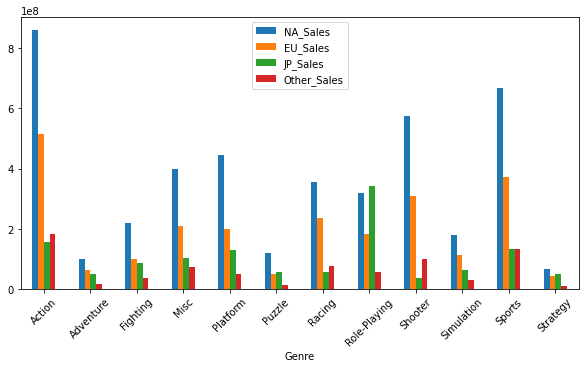

In [ ]:
games_genre.plot.bar(x='Genre', y=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],rot=45, figsize=(10,5))

In [ ]:
games_genre.reset_index(inplace=True)

In [ ]:
# 출고량 많은 순서대로 정렬 후, 지역별 출고량 저장
games_NA = games_genre.sort_values(by='NA_Sales', ascending=False).reset_index(drop=True)
games_NA = games_NA[['Genre','NA_Sales']]

games_EU = games_genre.sort_values(by='EU_Sales', ascending=False).reset_index(drop=True)
games_EU = games_EU[['Genre','EU_Sales']]

games_JP = games_genre.sort_values(by='JP_Sales', ascending=False).reset_index(drop=True)
games_JP = games_JP[['Genre','JP_Sales']]

games_Other = games_genre.sort_values(by='Other_Sales', ascending=False).reset_index(drop=True)
games_Other = games_Other[['Genre','Other_Sales']]

In [ ]:
import matplotlib as mpl

# 폰트 변환
mpl.rc("font", family='Malgun Gothic')

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

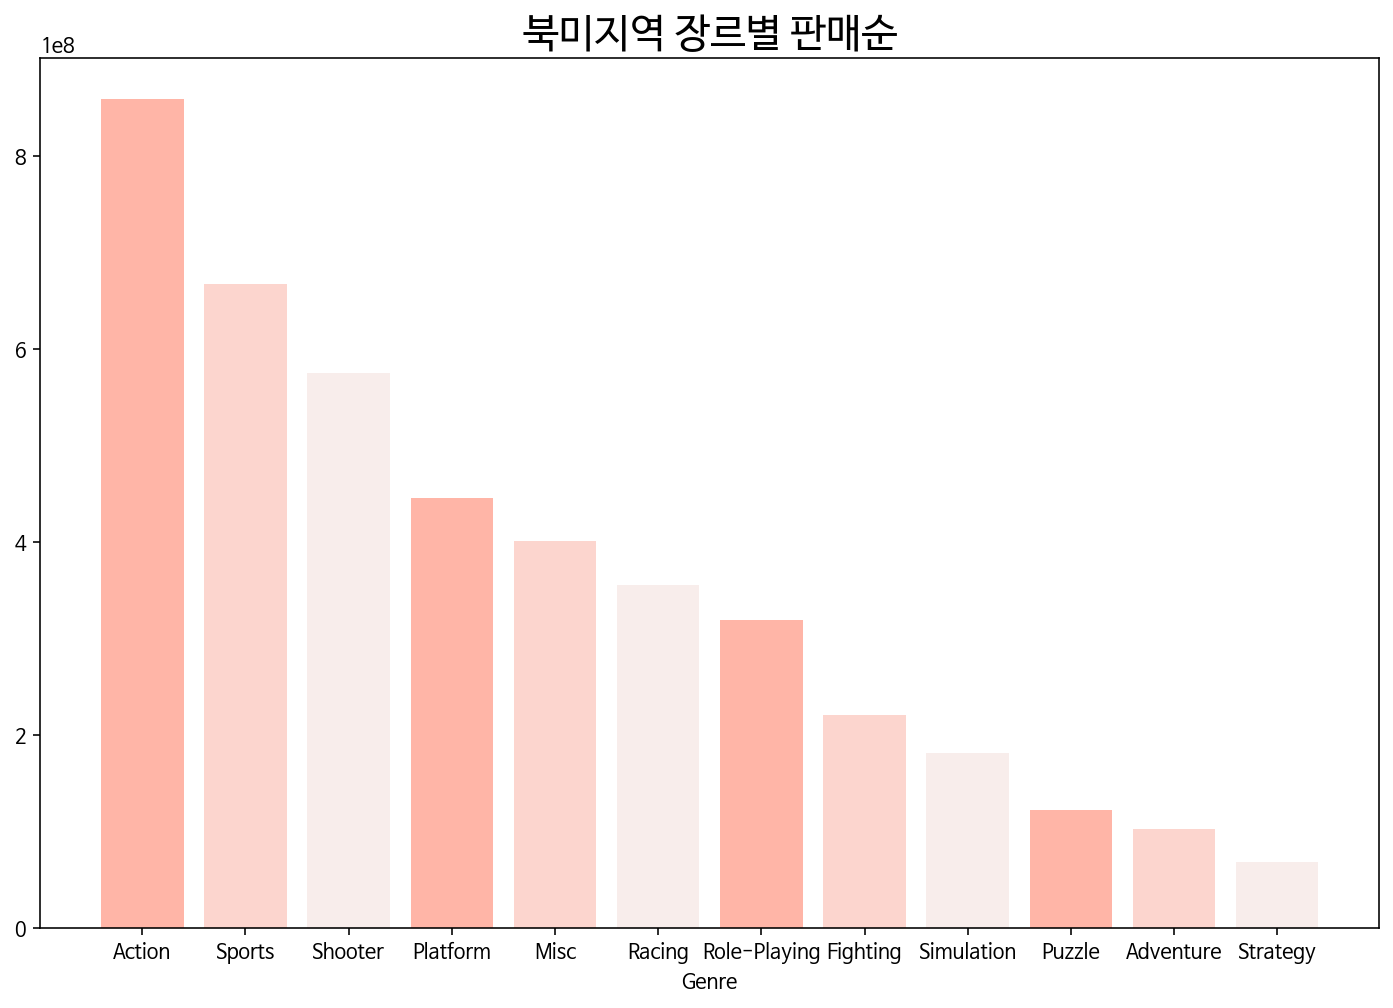

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(games_NA.Genre, games_NA.NA_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])
plt.title("북미지역 장르별 판매순", fontsize=20)
plt.xlabel("Genre")
plt.show()

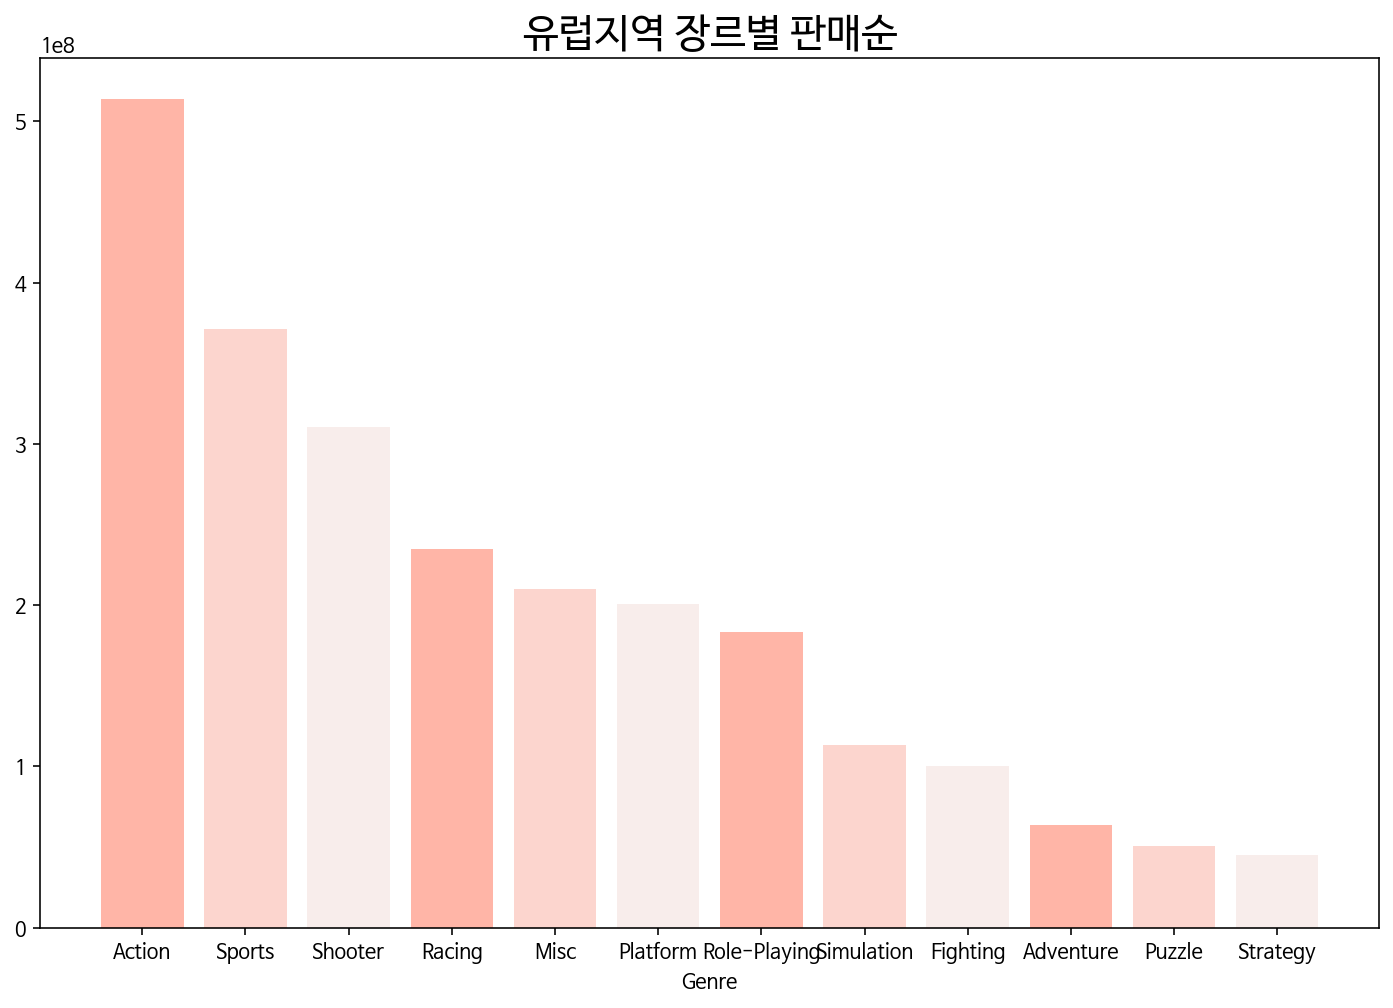

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(games_EU.Genre, games_EU.EU_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])
plt.title("유럽지역 장르별 판매순", fontsize=20)
plt.xlabel("Genre")
plt.show()

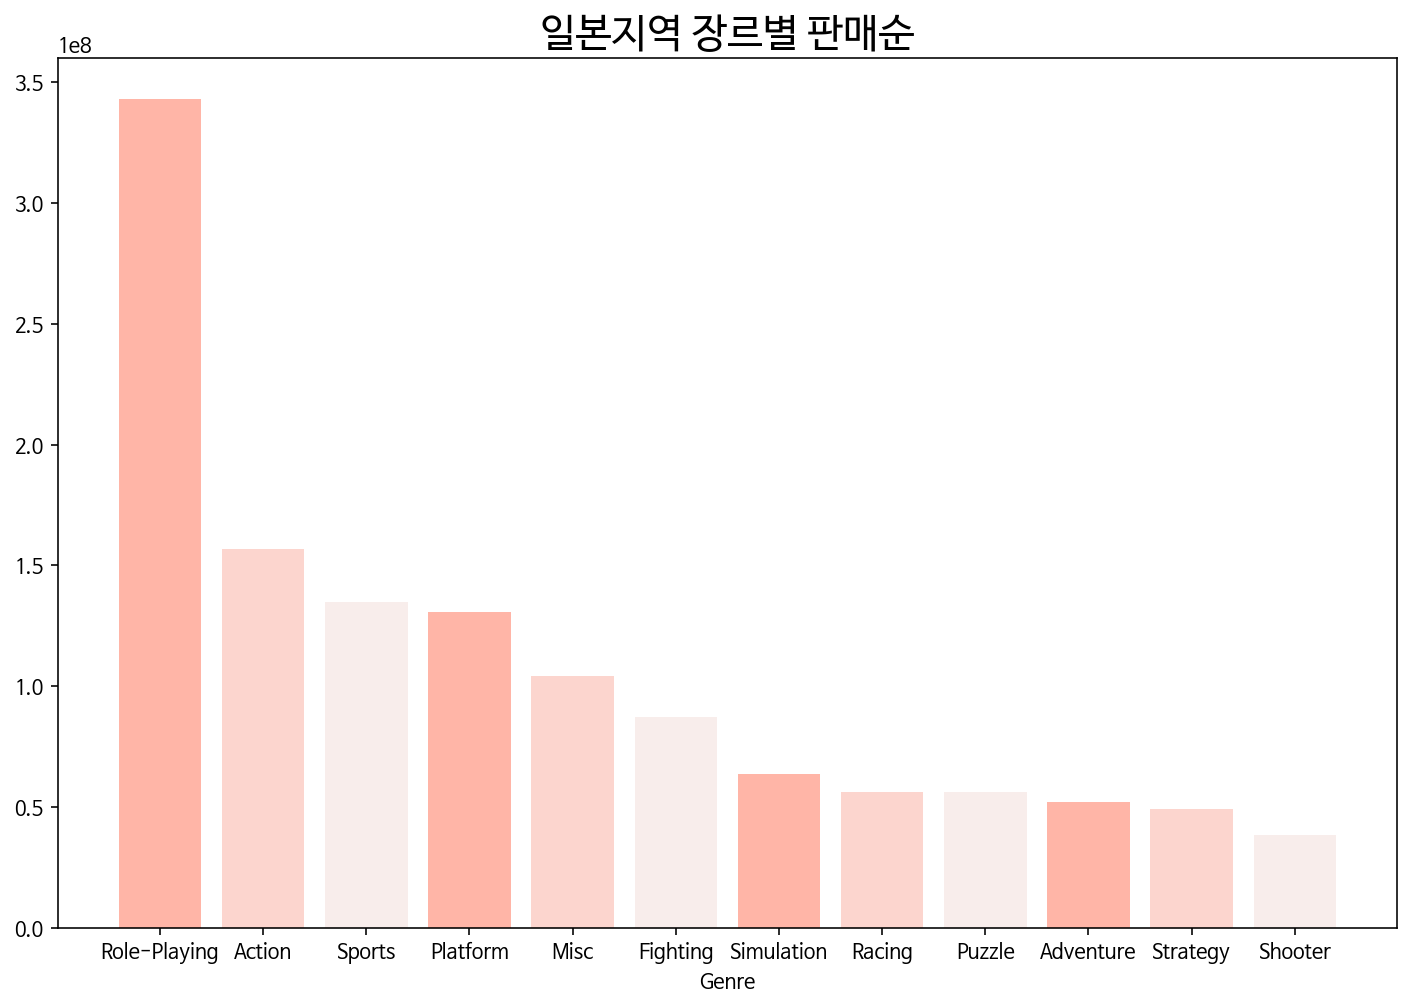

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(games_JP.Genre, games_JP.JP_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])
plt.title("일본지역 장르별 판매순", fontsize=20)
plt.xlabel("Genre")
plt.show()

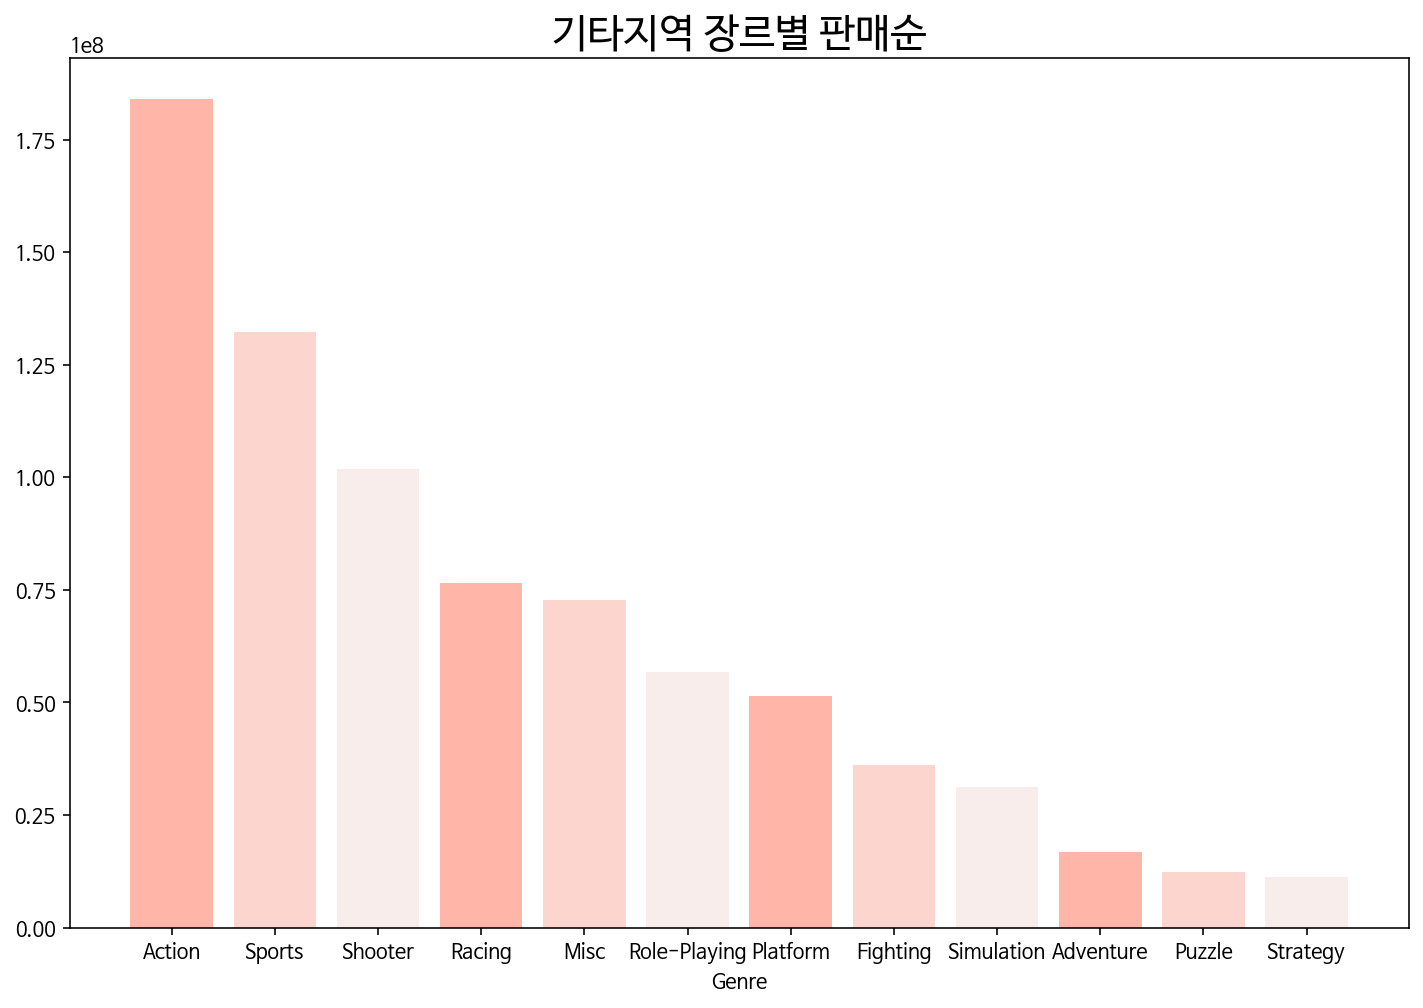

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(games_Other.Genre, games_Other.Other_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])
plt.title("기타지역 장르별 판매순", fontsize=20)
plt.xlabel("Genre")
plt.show()

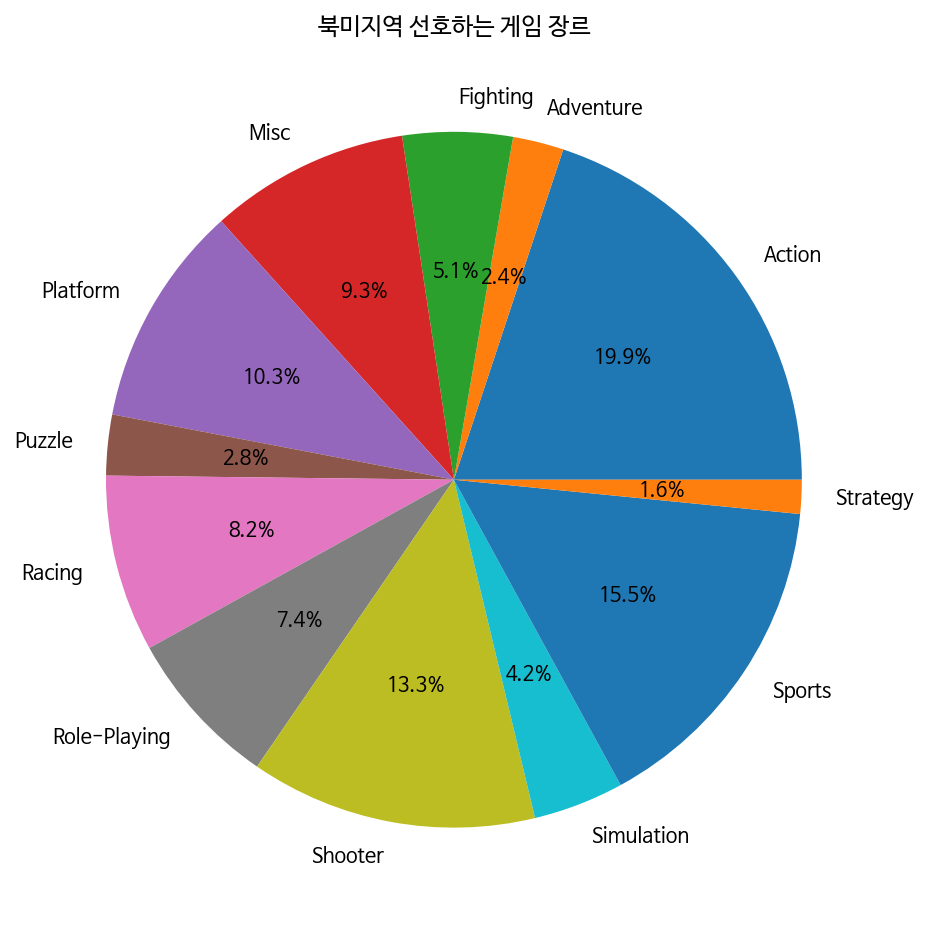

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(games_genre.NA_Sales, labels=games_genre.Genre, autopct='%.1f%%')
plt.title('북미지역 선호하는 게임 장르')
plt.show()

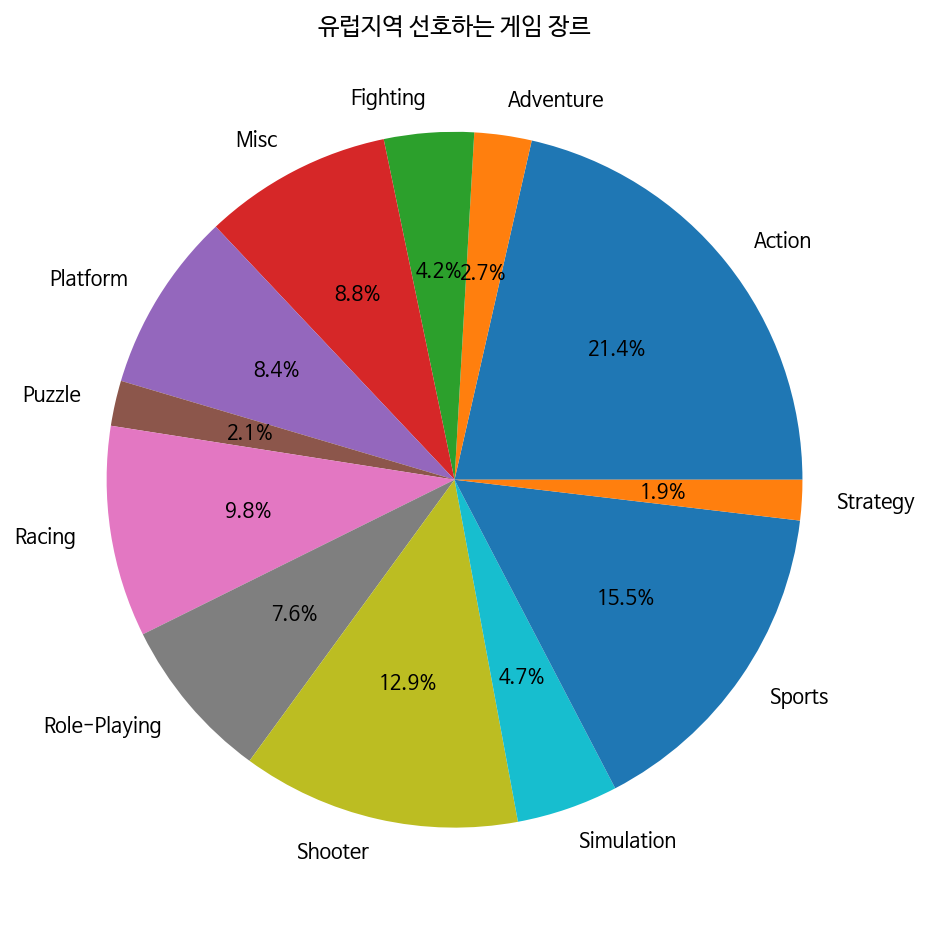

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(games_genre.EU_Sales, labels=games_genre.Genre, autopct='%.1f%%')
plt.title('유럽지역 선호하는 게임 장르')
plt.show()

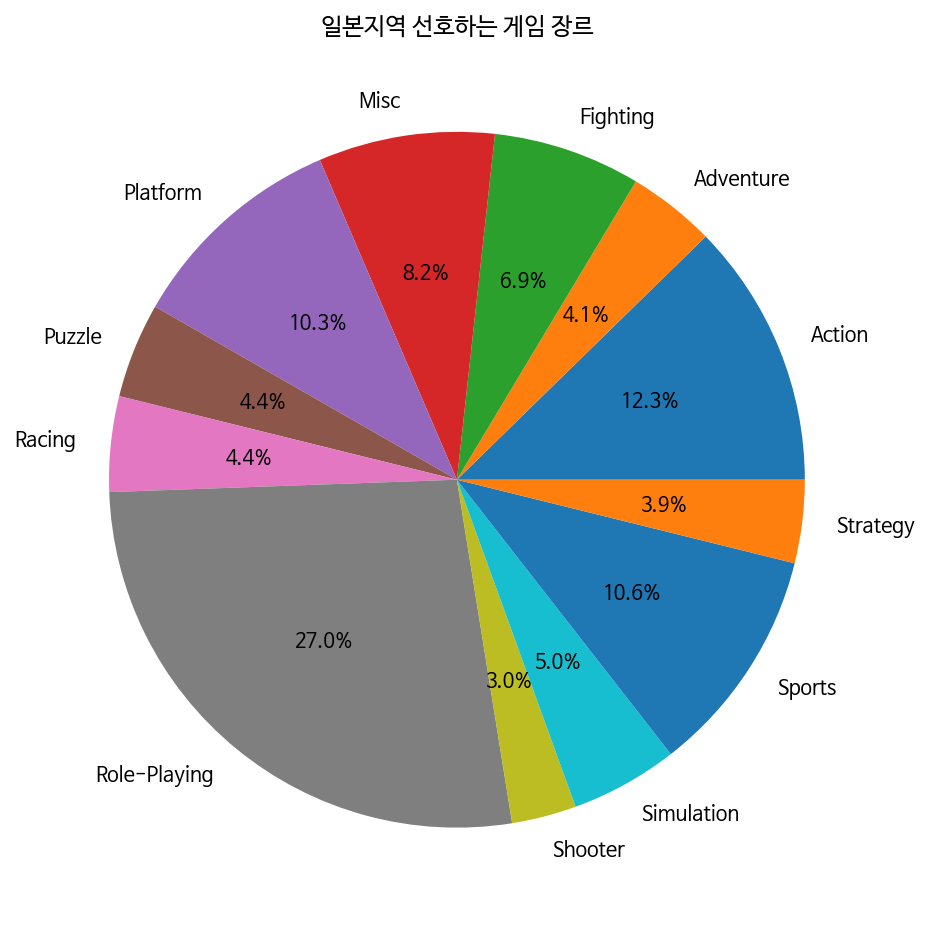

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(games_genre.JP_Sales, labels=games_genre.Genre, autopct='%.1f%%')
plt.title('일본지역 선호하는 게임 장르')
plt.show()

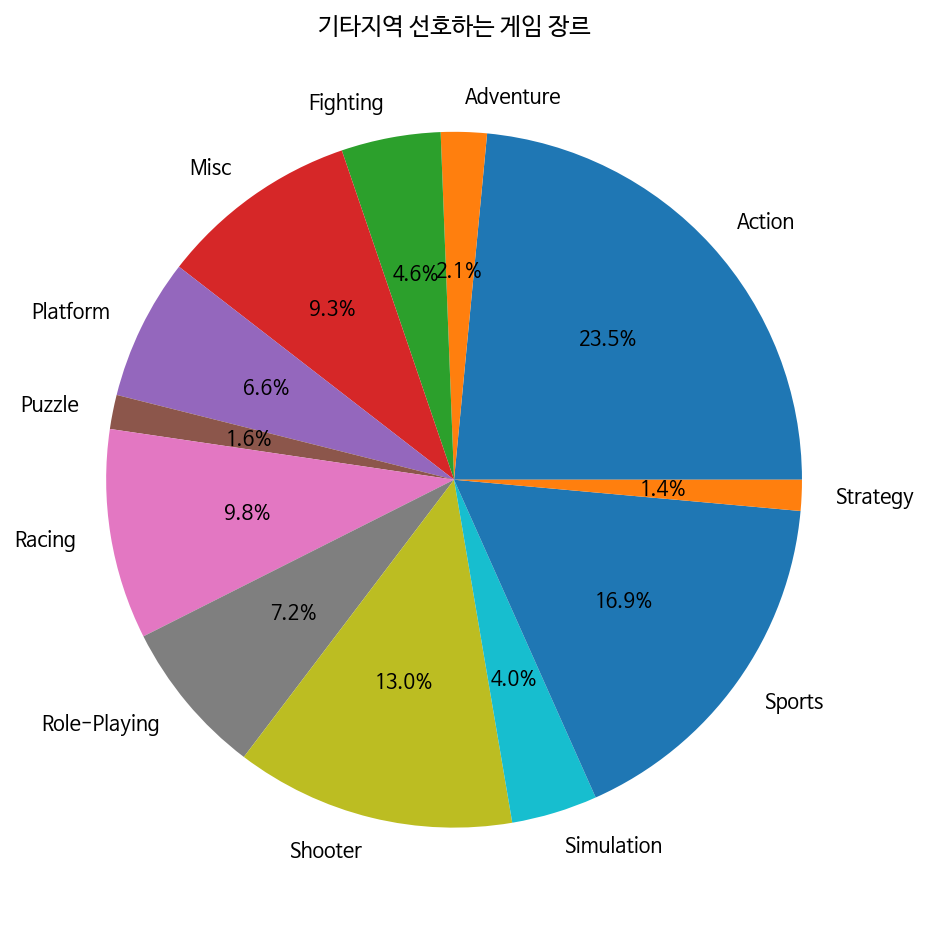

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(games_genre.Other_Sales, labels=games_genre.Genre, autopct='%.1f%%')
plt.title('기타지역 선호하는 게임 장르')
plt.show()

#### 3-2. 연도별 게임 트렌드

In [ ]:
# 데이터셋 확인
df_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [ ]:
# 지역별 총 합계 저장
df_game['Total_Sales'] = df_game['NA_Sales'] + df_game['EU_Sales'] + df_game['JP_Sales'] + df_game['Other_Sales']

In [ ]:
df_game2 = df_game[['Name','Year','Genre','Total_Sales']]

In [ ]:
# 1900년대와 2000년대 개수 확인
print((df_game2.Year < 2000).sum())
print((df_game2.Year >1999).sum())

1969
14308


In [ ]:
# 2000년대 데이터들만 확인
df_game2 = df_game2[df_game2['Year']>1999].reset_index(drop=True)

In [ ]:
# 장르 유니크값 확인
df_game2.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
# 장르별로 데이터 추출
Action = df_game2[df_game2.Genre == 'Action']
Adventure = df_game2[df_game2.Genre == 'Adventure']
Misc = df_game2[df_game2.Genre == 'Misc']
Platform = df_game2[df_game2.Genre == 'Platform']
Sports = df_game2[df_game2.Genre == 'Sports']
Simulation = df_game2[df_game2.Genre == 'Simulation']
Racing = df_game2[df_game2.Genre == 'Racing']
RolePlaying = df_game2[df_game2.Genre == 'Role-Playing']
Puzzle = df_game2[df_game2.Genre == 'Puzzle']
Strategy = df_game2[df_game2.Genre == 'Strategy']
Fighting = df_game2[df_game2.Genre == 'Fighting']
Shooter = df_game2[df_game2.Genre == 'Shooter']

In [ ]:
# 연도별로 데이터 묶어서 합계 계산
Action = Action.groupby('Year').sum().reset_index()
Adventure = Adventure.groupby('Year').sum().reset_index()
Misc = Misc.groupby('Year').sum().reset_index()
Platform = Platform.groupby('Year').sum().reset_index()
Sports = Sports.groupby('Year').sum().reset_index()
Simulation = Simulation.groupby('Year').sum().reset_index()
Racing = Racing.groupby('Year').sum().reset_index()
RolePlaying = RolePlaying.groupby('Year').sum().reset_index()
Puzzle = Puzzle.groupby('Year').sum().reset_index()
Strategy = Strategy.groupby('Year').sum().reset_index()
Fighting = Fighting.groupby('Year').sum().reset_index()
Shooter = Shooter.groupby('Year').sum().reset_index()

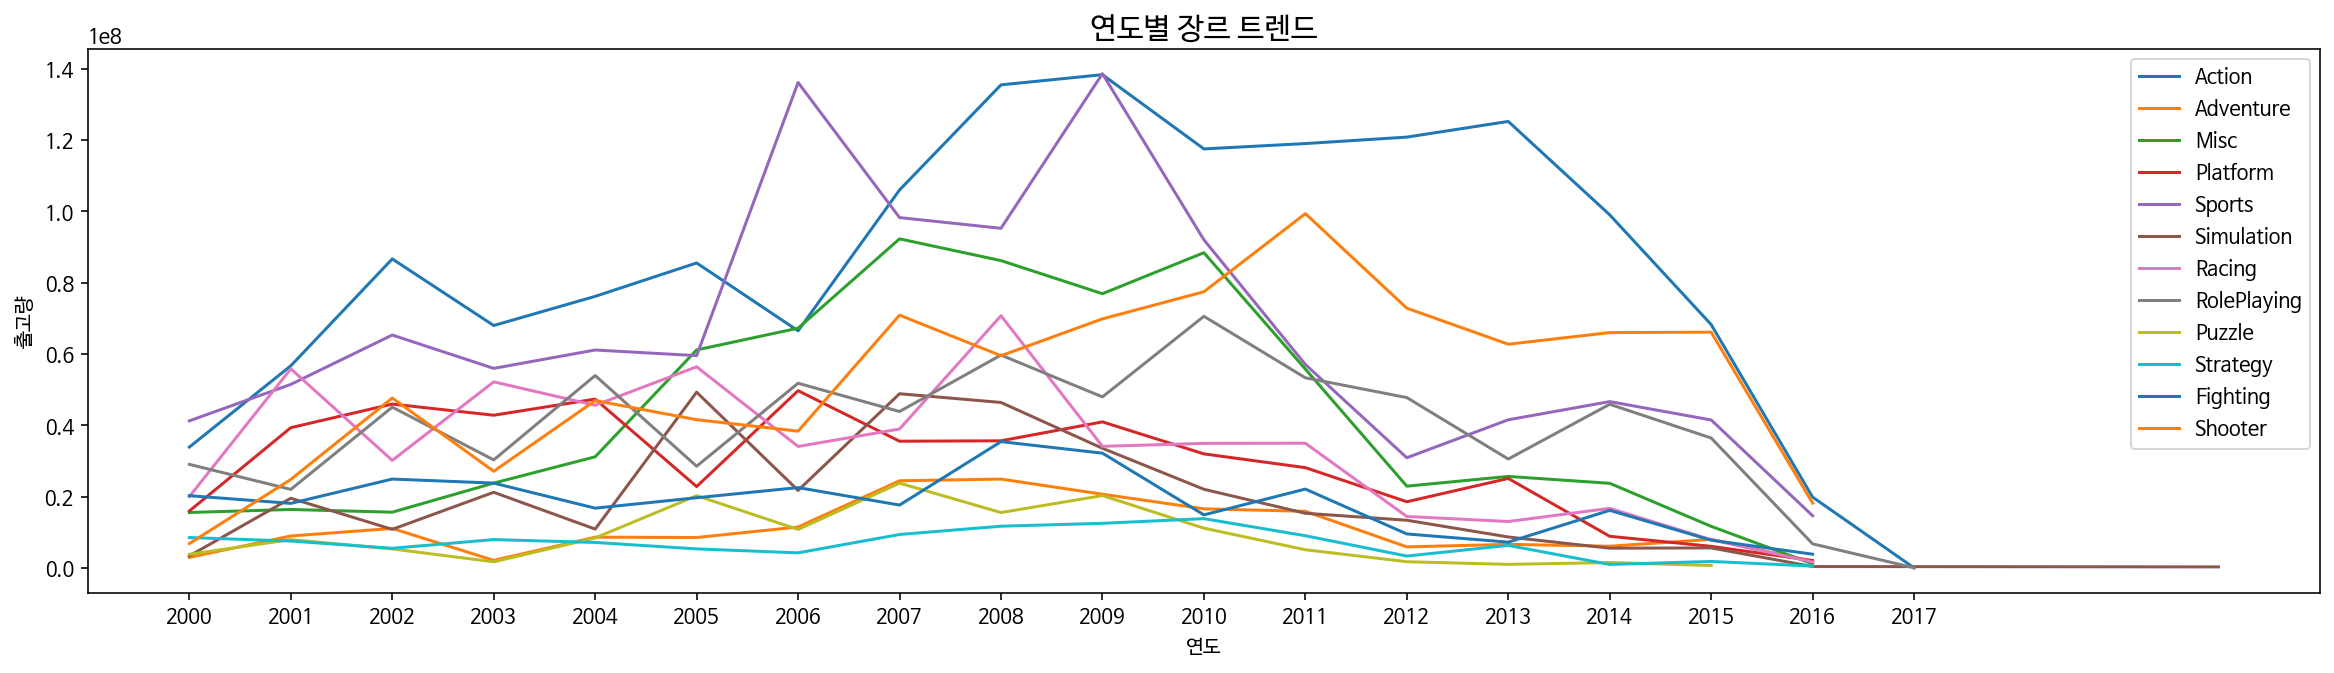

In [ ]:
plt.figure(figsize=(20, 5))
# plt.bar(games_NA.Genre, games_NA.NA_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])

plt.plot(Action.Year, Action.Total_Sales, label='Action')
plt.plot(Adventure.Year, Adventure.Total_Sales, label='Adventure')
plt.plot(Misc.Year, Misc.Total_Sales, label='Misc')
plt.plot(Platform.Year, Platform.Total_Sales, label='Platform')
plt.plot(Sports.Year, Sports.Total_Sales, label='Sports')
plt.plot(Simulation.Year, Simulation.Total_Sales, label='Simulation')
plt.plot(Racing.Year, Racing.Total_Sales, label='Racing')
plt.plot(RolePlaying.Year, RolePlaying.Total_Sales, label='RolePlaying')
plt.plot(Puzzle.Year, Puzzle.Total_Sales, label='Puzzle')
plt.plot(Strategy.Year, Strategy.Total_Sales, label='Strategy')
plt.plot(Fighting.Year, Fighting.Total_Sales, label='Fighting')
plt.plot(Shooter.Year, Shooter.Total_Sales, label='Shooter')

plt.xticks(Action.Year)
plt.title('연도별 장르 트렌드',fontsize=15)
plt.xlabel('연도', fontsize=10)
plt.ylabel('출고량',fontsize=10)
plt.legend()
plt.show()

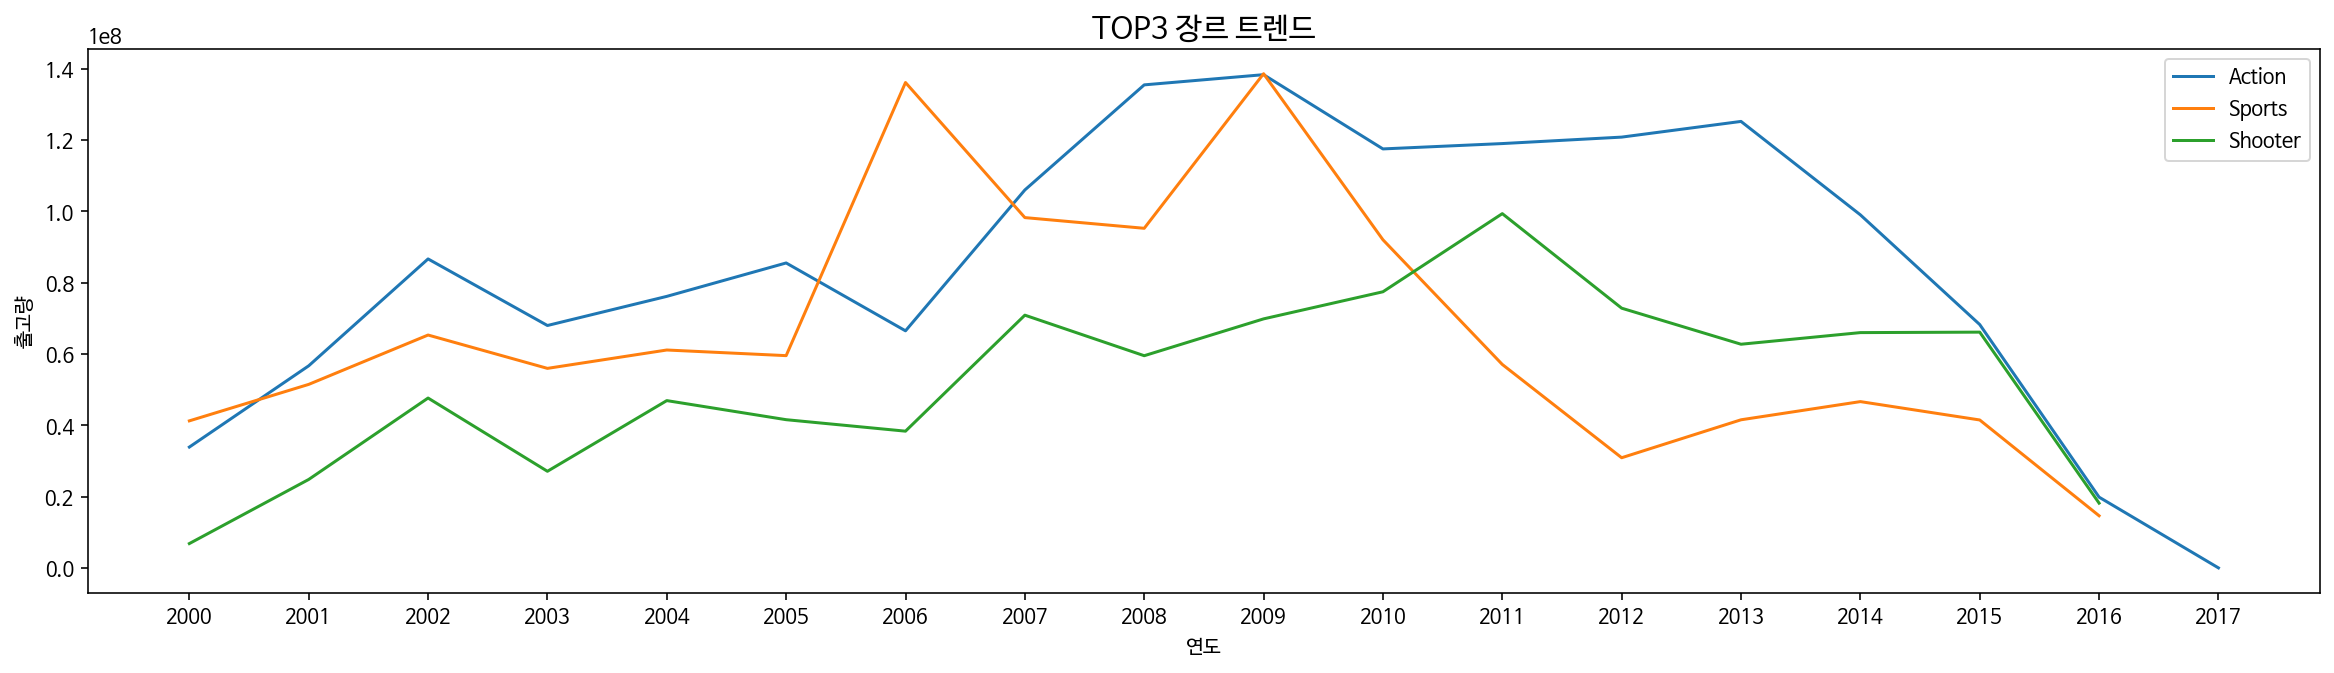

In [ ]:
plt.figure(figsize=(20, 5))
# plt.bar(games_NA.Genre, games_NA.NA_Sales, color=['#ffb5a7','#fcd5ce','#f8edeb'])

plt.plot(Action.Year, Action.Total_Sales, label='Action')
plt.plot(Sports.Year, Sports.Total_Sales, label='Sports')
plt.plot(Shooter.Year, Shooter.Total_Sales, label='Shooter')

plt.xticks(Action.Year)
plt.title('TOP3 장르 트렌드',fontsize=15)
plt.xlabel('연도', fontsize=10)
plt.ylabel('출고량',fontsize=10)
plt.legend()
plt.show()

#### 3-3. 인기 많은 게임 분석 및 시각화

In [ ]:
df_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [ ]:
df_game3 = df_game[['Name','Platform','Year','Total_Sales']]

In [ ]:
# 플랫폼별 데이터 개수
platform = df_game3.groupby('Platform').count().sort_values(by='Name',ascending=False).reset_index()

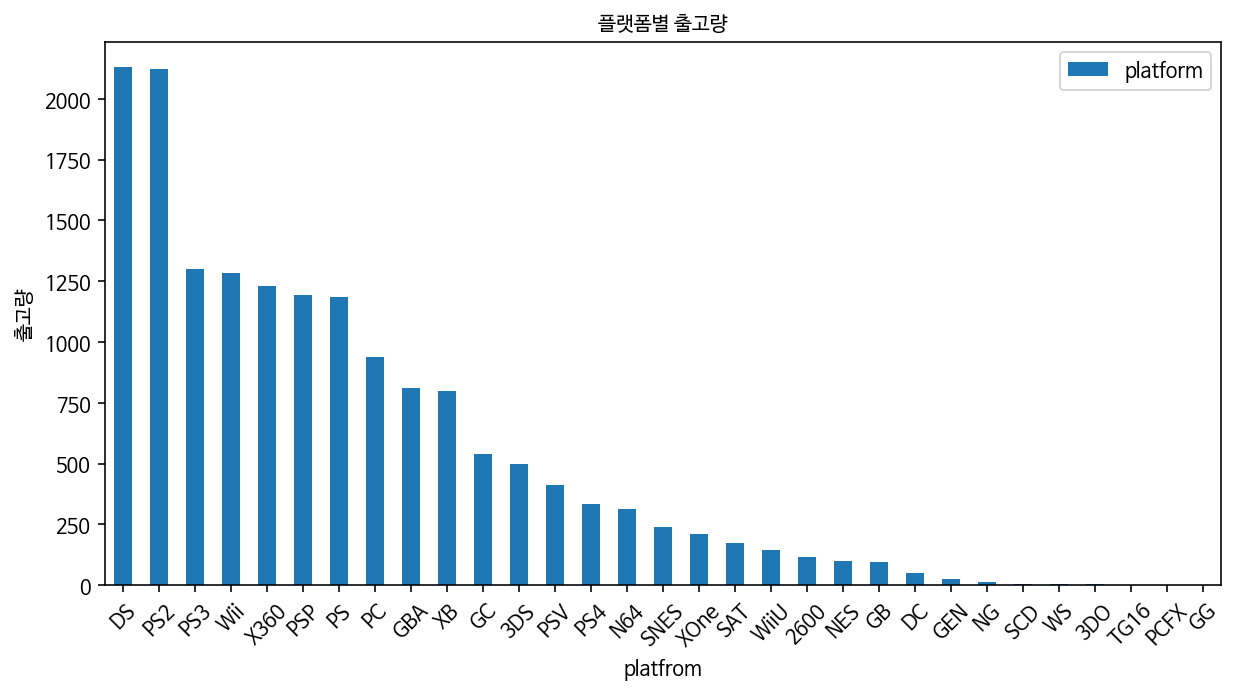

In [ ]:
platform.plot.bar(x='Platform', y='Name',rot=45, figsize=(10,5), label='platform')
plt.xlabel('platfrom')
plt.ylabel('출고량')
plt.title('플랫폼별 출고량', fontsize=10)
plt.legend()

In [ ]:
# 상위 다섯개 플랫폼 출고량 확인
DS = df_game3[df_game3.Platform == 'DS']
DS = DS.groupby('Year').sum().reset_index()

PS2 = df_game3[df_game3.Platform == 'PS2']
PS2 = PS2.groupby('Year').sum().reset_index()

PS3 = df_game3[df_game3.Platform == 'PS3']
PS3 = PS3.groupby('Year').sum().reset_index()

Wii = df_game3[df_game3.Platform == 'Wii']
Wii = Wii.groupby('Year').sum().reset_index()

X360 = df_game3[df_game3.Platform == 'X360']
X360 = X360.groupby('Year').sum().reset_index()

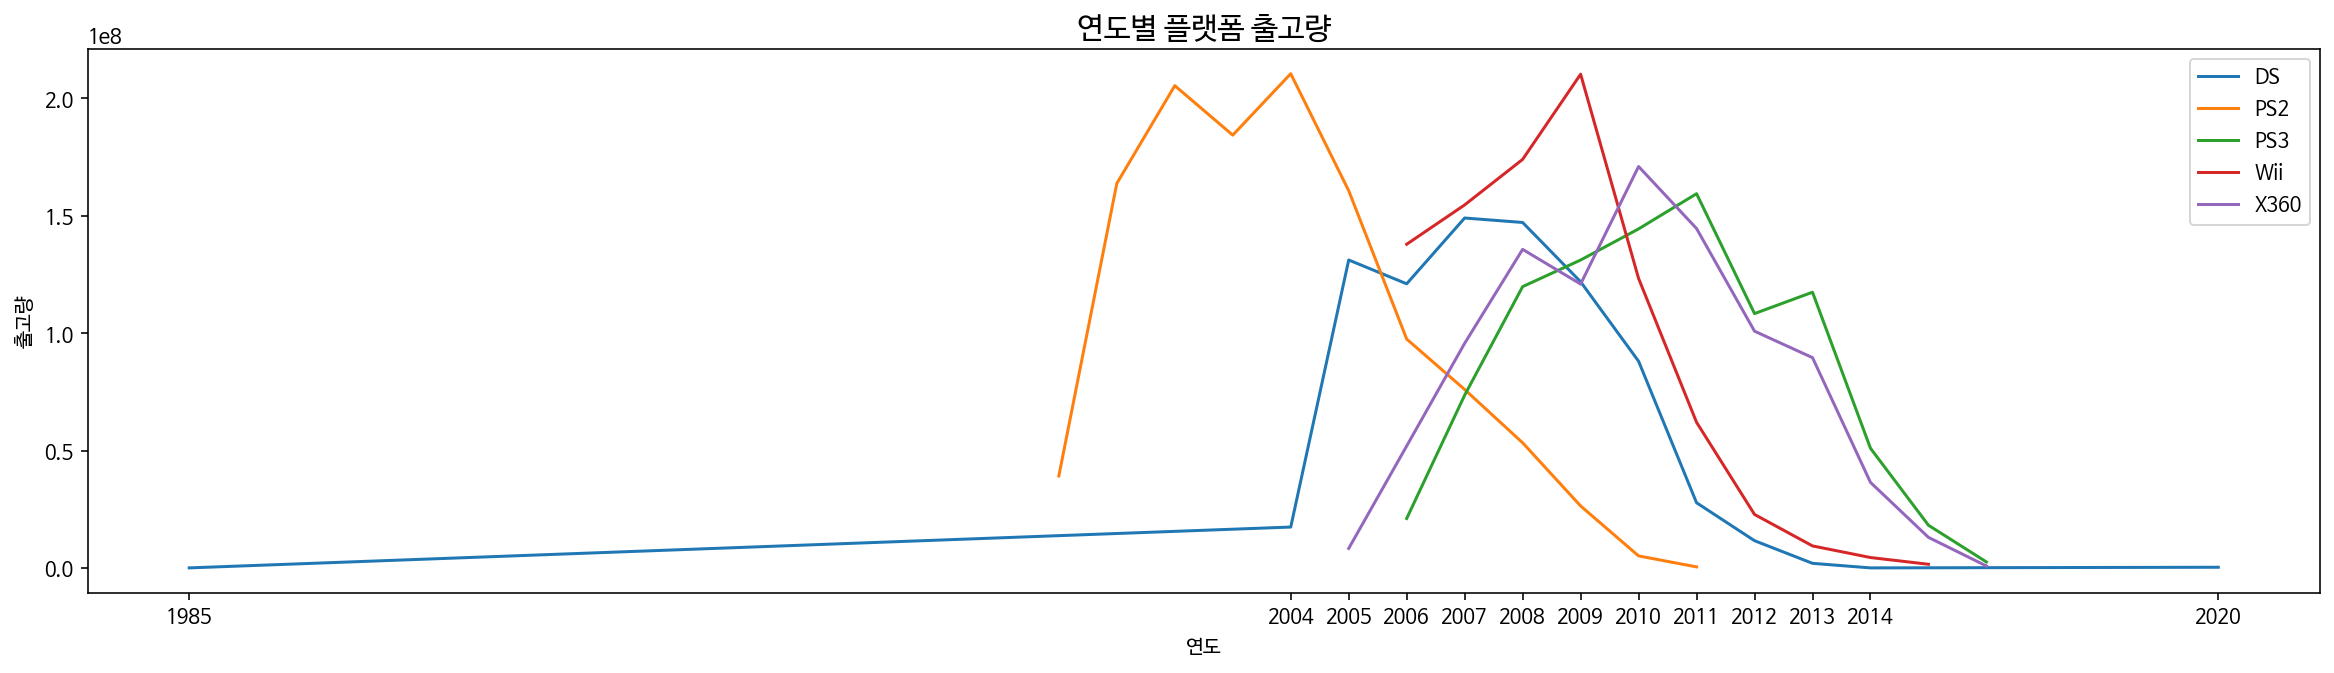

In [ ]:
plt.figure(figsize=(20, 5))

plt.plot(DS.Year, DS.Total_Sales, label='DS')
plt.plot(PS2.Year, PS2.Total_Sales, label='PS2')
plt.plot(PS3.Year, PS3.Total_Sales, label='PS3')
plt.plot(Wii.Year, Wii.Total_Sales, label='Wii')
plt.plot(X360.Year, X360.Total_Sales, label='X360')

plt.xticks(DS.Year)
plt.title('연도별 플랫폼 출고량',fontsize=15)
plt.xlabel('연도', fontsize=10)
plt.ylabel('출고량',fontsize=10)
plt.legend()
plt.show()

In [ ]:
# PS3 이면서 액션 장르 추출
Rank = df_game[df_game['Platform'].str.contains('PS3') & df_game['Genre'].str.contains('Action')].sort_values(by='Total_Sales', ascending=False)

In [ ]:
Rank = Rank.reset_index(drop=True)
Rank = Rank.iloc[:5]

In [ ]:
Rank

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
1,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4760000,3760000,440000,1620000,10580000
2,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1060000,5050000,130000,2009999,8249999
3,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2770000,2800000,190000,1060000,6820000
4,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3270000,2250000,210000,1000000,6730000


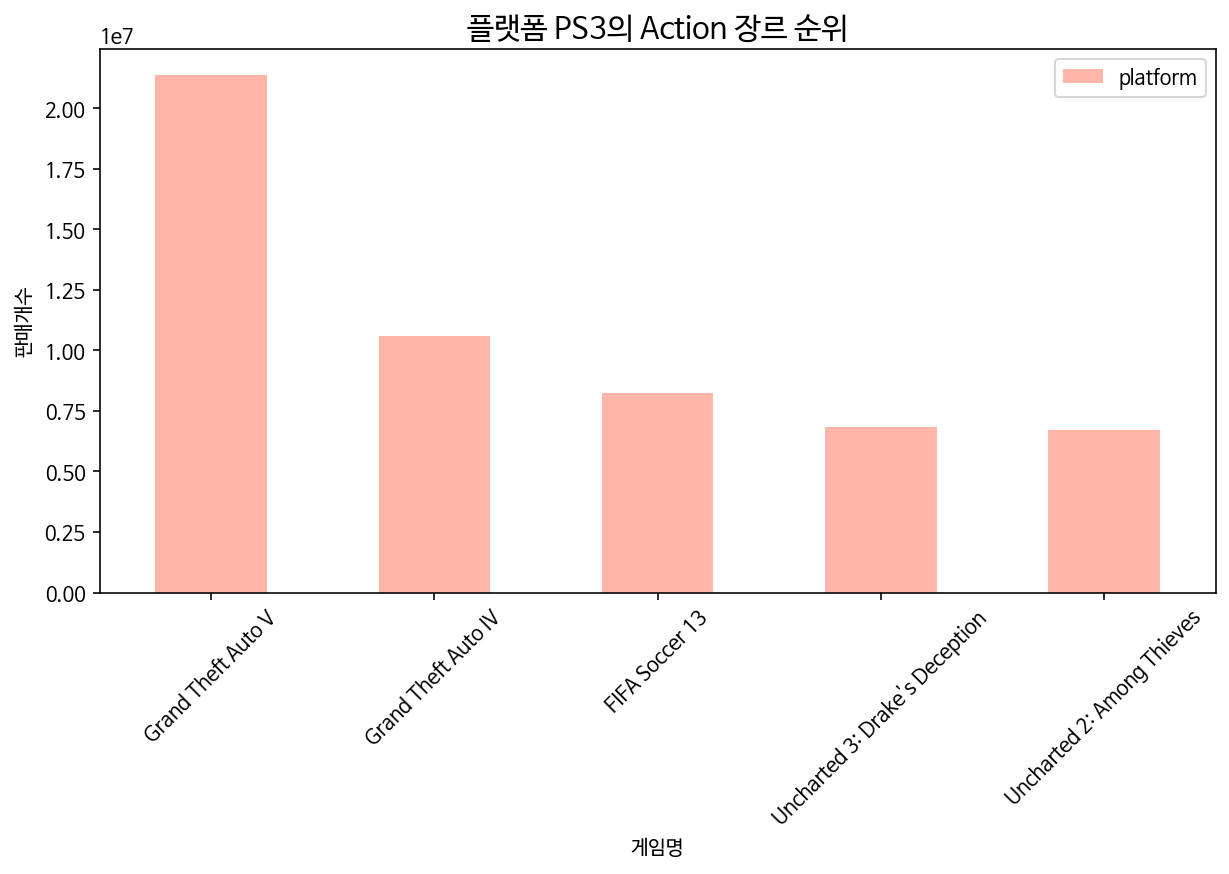

In [ ]:
Rank.plot.bar(x='Name', y='Total_Sales',rot=45, figsize=(10,5), label='platform', color='#ffb5a7' )

plt.title('플랫폼 PS3의 Action 장르 순위',fontsize=15)
plt.xlabel('게임명')
plt.ylabel('판매개수')
plt.legend()

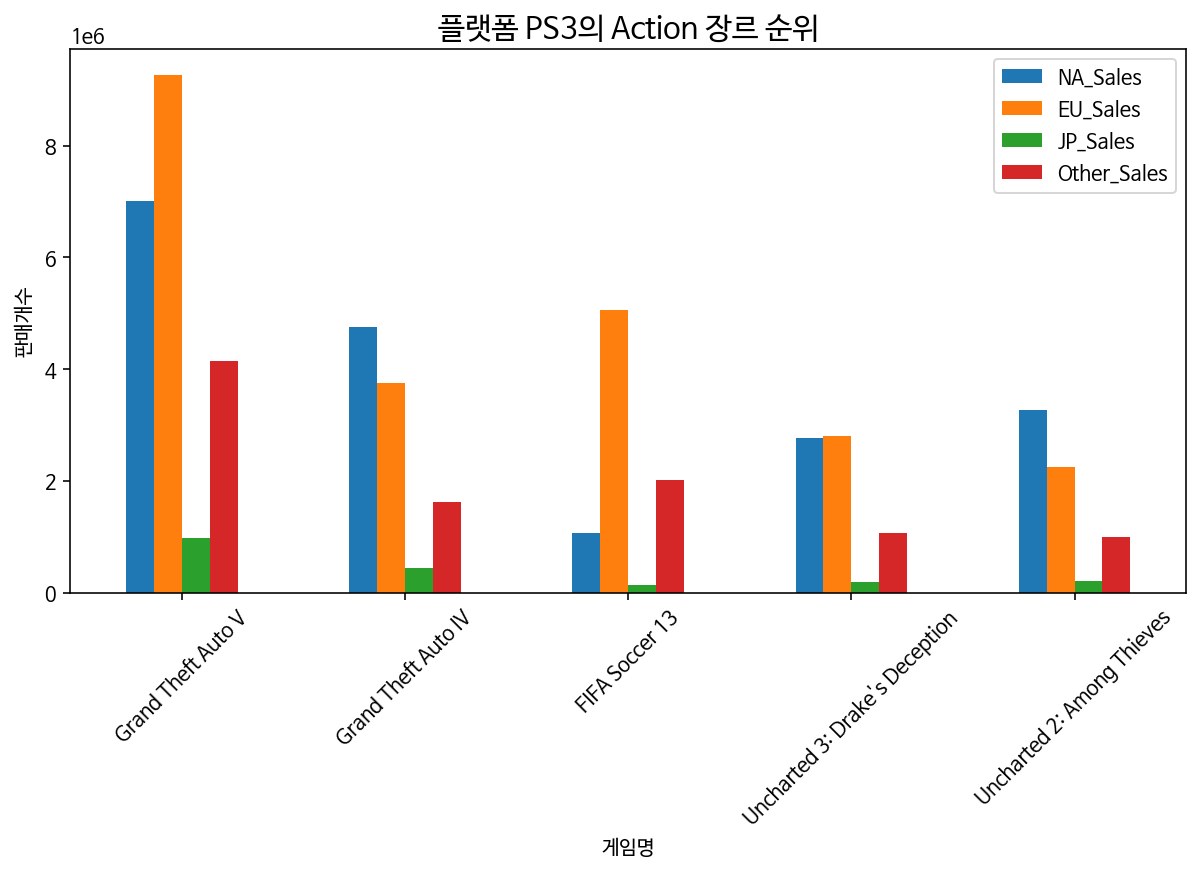

In [ ]:
Rank.plot.bar(x='Name', y=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],rot=45, figsize=(10,5))

plt.title('플랫폼 PS3의 Action 장르 순위',fontsize=15)
plt.xlabel('게임명')
plt.ylabel('판매개수')
plt.legend()

In [ ]:
# 게임 이름에 GTA가 들어가는 행 추출
df_gta = df_game[df_game['Name'].str.contains('Grand Theft Auto')].sort_values(by='Total_Sales', ascending=False)

In [ ]:
# 연도별로 GTA 출고량 분석
df_gta_year = df_gta.groupby('Year').sum().reset_index(drop=False)

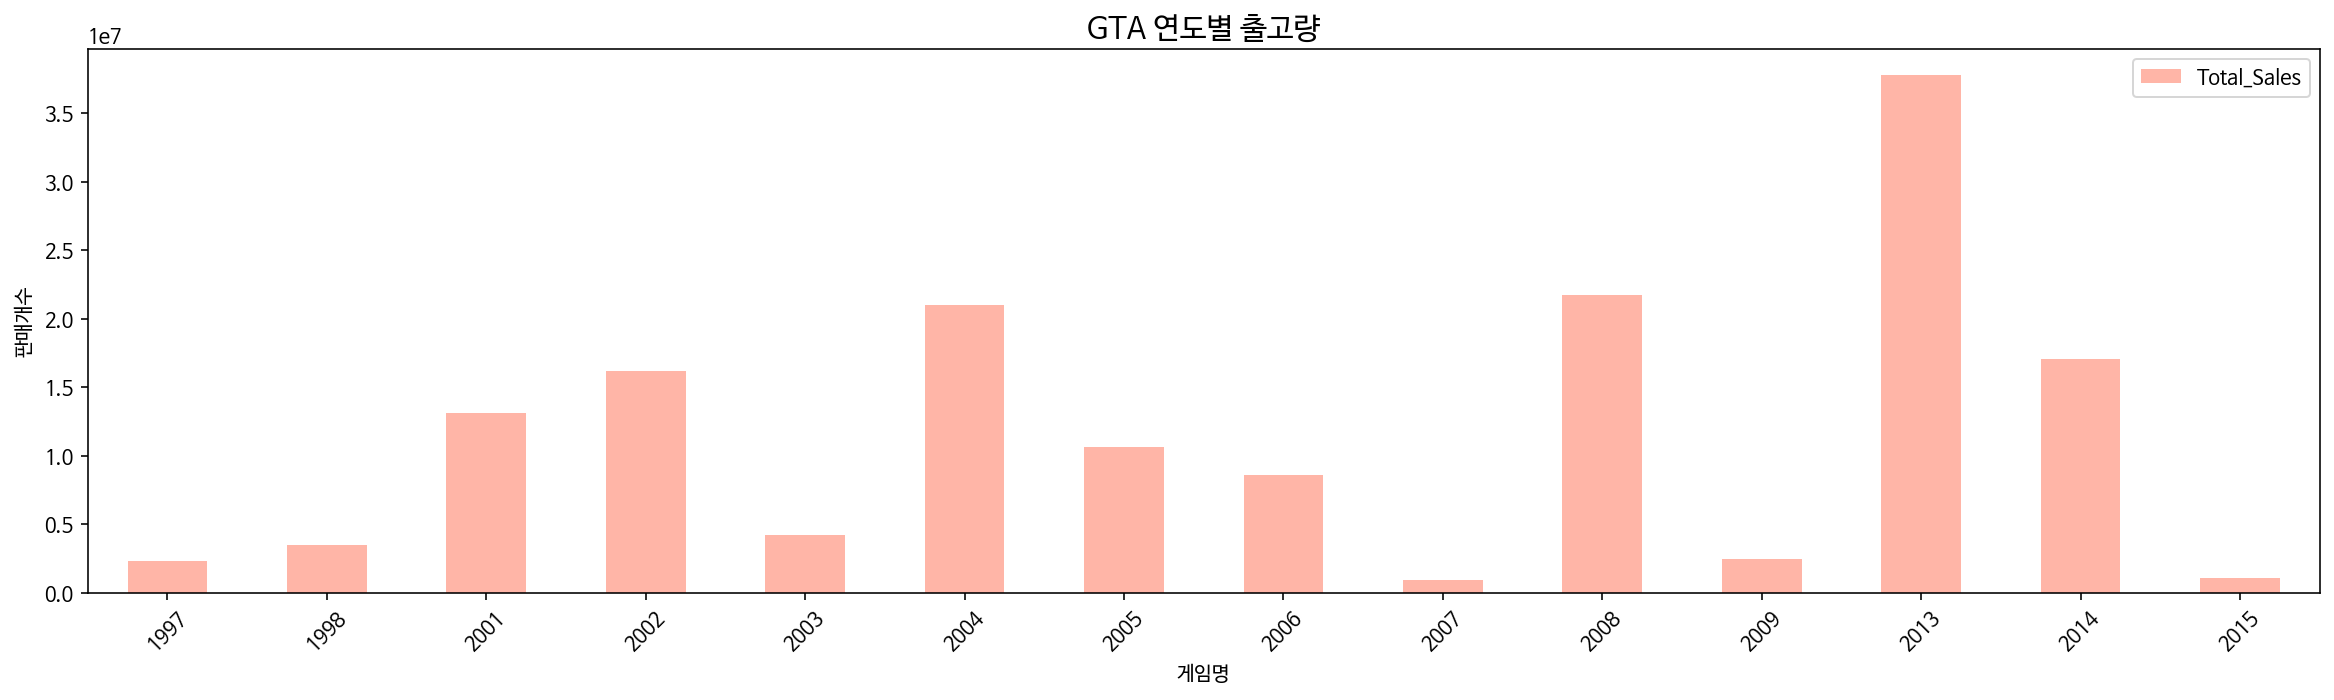

In [ ]:
df_gta_year.plot.bar(x='Year', y='Total_Sales',rot=45, figsize=(20,5), color='#ffb5a7')

plt.title('GTA 연도별 출고량',fontsize=15)
plt.xlabel('게임명')
plt.ylabel('판매개수')
plt.legend()

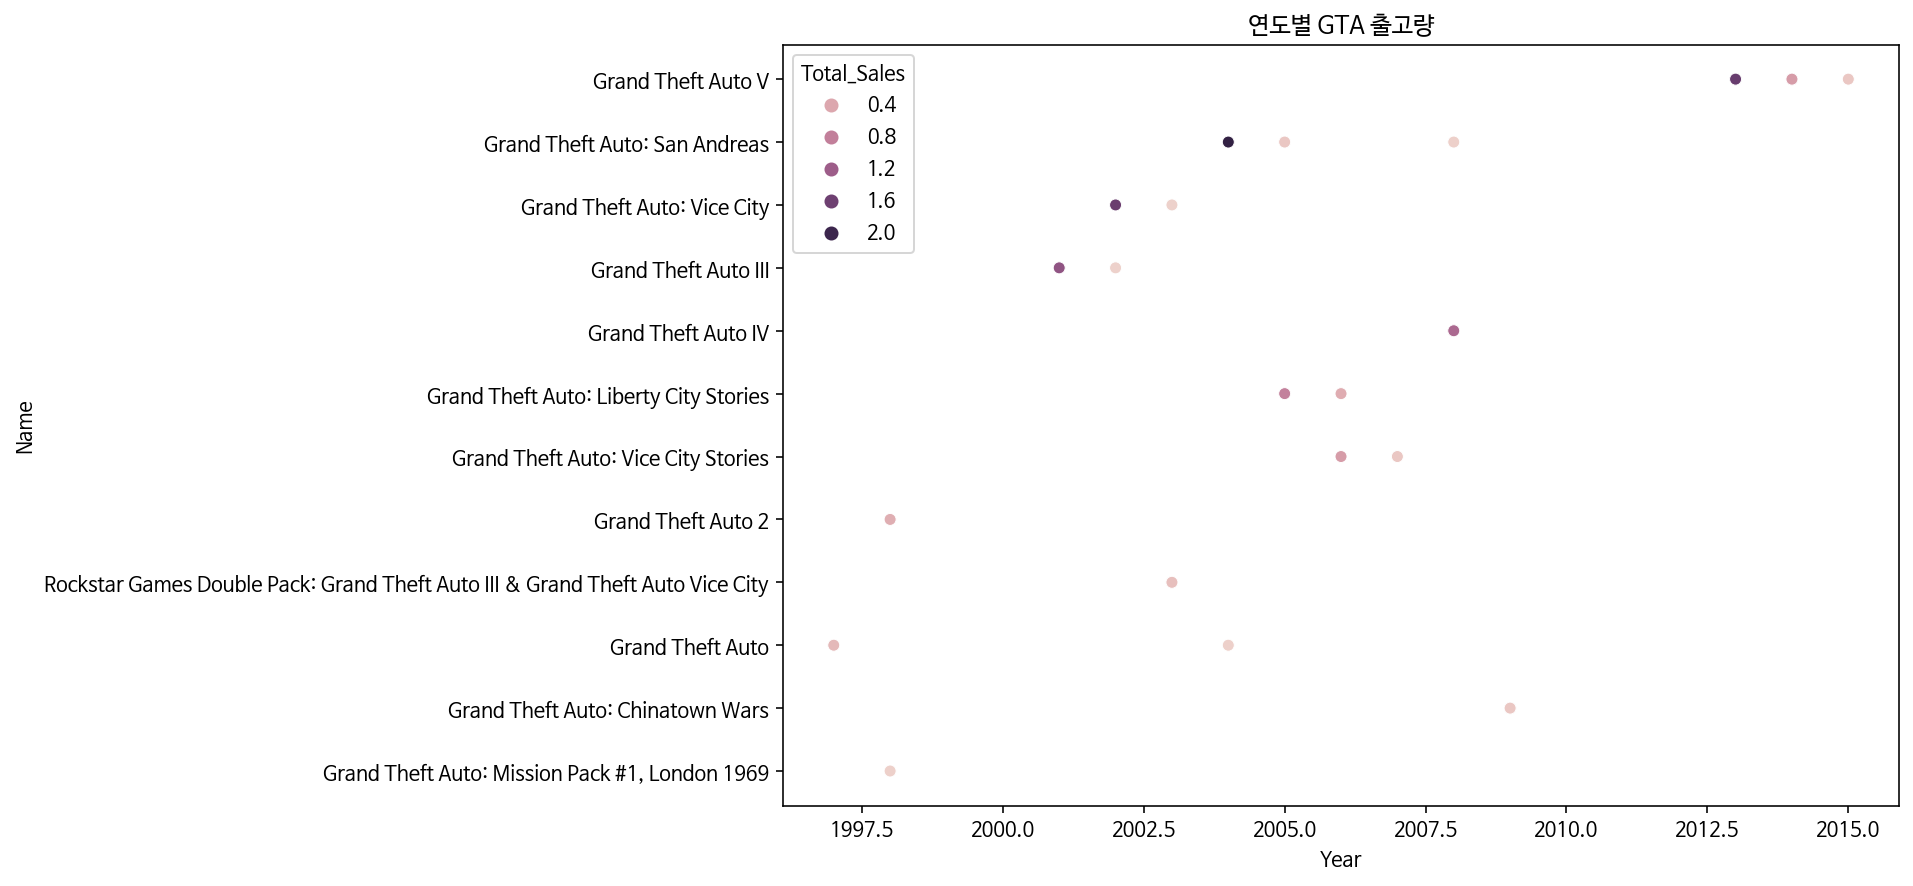

In [ ]:
# 연도별 GTA 출고량
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='Year', y='Name', data=df_gta, hue='Total_Sales')
plt.title('연도별 GTA 출고량')
plt.show()